# Set up the repository

In [1]:
if 'google.colab' in str(get_ipython()):
    # Move to the root
    import os
    os.chdir('/content')
    !git clone https://gitlab.com/jemaro/wut/neural-networks/style-transfer
    !cd style-transfer; git pull

# Run the style transfer

style_transfer [INFO]: Start run
style_transfer [INFO]: Start run with kwargs = {'content_path': WindowsPath('C:/Users/esdan/Desktop/style-transfer/datasets/style_transfer/content/houses.jpg'), 'style_path': WindowsPath('C:/Users/esdan/Desktop/style-transfer/datasets/style_transfer/style/kanagawa.jpg'), 'content_layers': ['block5_conv2'], 'style_layers': ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1'], 'pre_training': True, 'learning_rate': 5, 'beta_1': 0.99, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': True, 'content_weight': 1000.0, 'style_weight': 0.01, 'num_iterations': 1000}
{'content_path': <generator object Path.iterdir at 0x000002D61A0AD970>, 'style_path': <generator object Path.iterdir at 0x000002D61A0AD190>, 'content_layers': <map object at 0x000002D61A593DC0>, 'style_layers': <map object at 0x000002D61A56C190>, 'pre_training': [True, False], 'learning_rate': [5], 'beta_1': [0.99], 'beta_2': [0.999], 'epsilon': [1e-07], 'amsgrad': [True, Fals

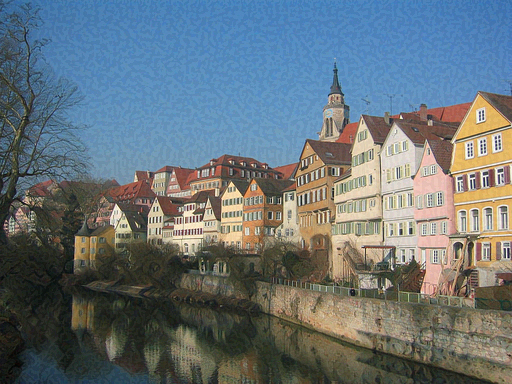

stats (2020-12-16 18:01:36,172): 2.6925,0,4.2510e+08,4.2510e+08,0.0000e+00,2.6925
style_transfer.style_transfer [ERROR]: Keyboard Interrupt


KeyboardInterrupt: 

In [4]:
if 'google.colab' in str(get_ipython()):
    # Move to the repository
    import os
    os.chdir('/content/style-transfer')
    OUTPUT_FOLDER='/content/drive/MyDrive/style_transfer'
else:
    from style_transfer.config import OUTPUT_FOLDER

import itertools
from pathlib import Path
from datetime import datetime

from style_transfer import run_style_transfer
from style_transfer.config import STYLE_FOLDER, CONTENT_FOLDER
from style_transfer._logging import config_logger
from style_transfer.utils import append_codename

logger = config_logger(output_folder=OUTPUT_FOLDER)

logger.info('Start run')
experiments = {
    'content_path': CONTENT_FOLDER.iterdir(),
    'style_path': STYLE_FOLDER.iterdir(),
    'content_layers': map(append_codename, [
        ['block5_conv2'],
    ]),
    'style_layers': map(append_codename, [
        [
            'block1_conv1', 'block2_conv1', 'block3_conv1', 
            'block4_conv1', 'block5_conv1',
        ],
    ]),
    'pre_training': [True, False],
    'learning_rate': [5],
    'beta_1': [0.99],
    'beta_2': [0.999],
    'epsilon': [1e-07],
    'amsgrad': [True, False],
    'content_weight': [1e3],
    'style_weight': [1e-2],
    'num_iterations': [1000],
}

# Create output folder
output_folder = Path(OUTPUT_FOLDER, datetime.now().strftime('%Y%m%d_%H%M%S'))
output_folder.mkdir(parents=True)

for values in itertools.product(*experiments.values()):
    kwargs = dict(zip(experiments.keys(), values))
    run_folder = output_folder
    # Build run folder and correct kwargs removing the folder names from tuples
    for key, value in kwargs.items():
        Path(run_folder, key).touch()
        if isinstance(value, tuple):
            kwargs[key] = value[1]
            folder = value[0]
        elif isinstance(value, Path):
            folder = value.stem
        elif isinstance(value, float):
            folder = f'{value:.4e}'
        else:
            folder = str(value)
        run_folder = Path(run_folder, folder)
        run_folder.mkdir(parents=True, exist_ok=True)
    logger.info(f'Start run with kwargs = {kwargs}')
    run_style_transfer(
        output_folder=run_folder,
        verbose=False,
        log_images=True,
        **kwargs
        )
            
logger.info('Finished run')